In [55]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
class scenarios:
    def __init__(self, returns_arr, prize_arr, cost_yoga, buffer):
        self.r = returns_arr #size 14
        self.p = prize_arr[:14] #prize_arr supposed to be size 15
        self.c = cost_yoga + buffer + prize_arr[14]
        self.final = 20000*np.prod([(1+r) for r in self.r]) + 80000*np.prod([(1+r) for r in self.r[5:]]) - np.sum([self.p[i]*np.prod([(1+self.r[j]) for j in range(i,14)]) for i in range(5,14)])
    def diff(self):
        return self.final - self.c

In [97]:
cost = [63600, 102958, 150950]
buffer = 50000
r1 = [0.104 for i in range(14)]
p1 = [7500 for i in range(15)]
s1 = scenarios(r1, p1, cost[1], buffer)

In [98]:
s1.diff()

3.647658475616481

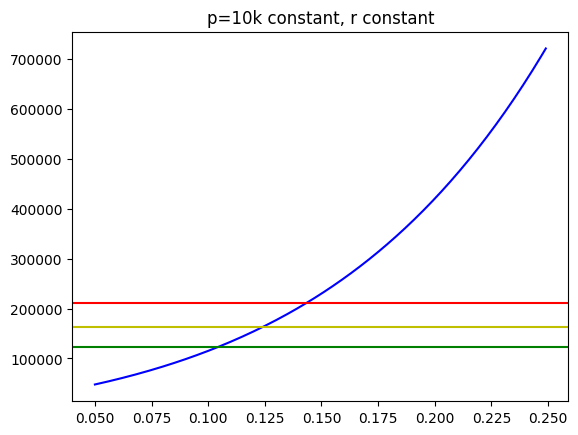

In [100]:
x2 = np.linspace(0.05, 0.25, num=200, endpoint=False)
p2 = [10000 for i in range(15)]
s2 = [scenarios([i for j in range(14)], p2, cost[1], buffer).final for i in x2]
plt.plot(x2,s2,color='b')
plt.axhline(cost[0]+buffer+p2[14], color='g')
plt.axhline(cost[1]+buffer+p2[14], color='y')
plt.axhline(cost[2]+buffer+p2[14], color='r')
plt.title(f'p=10k constant, r constant')
plt.show()

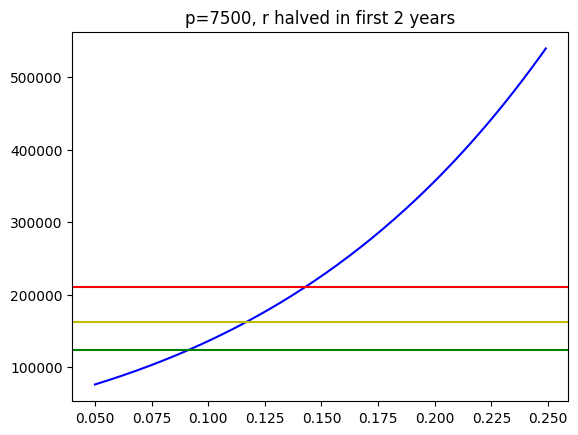

In [102]:
x2 = np.linspace(0.05, 0.25, num=200, endpoint=False)
p3 = [7500 for i in range(15)]
p3[5:6] = [10000,10000]
s3 = [scenarios([0.084472]*5 + [i]*9, p3, cost[1], buffer).final for i in x2]
plt.plot(x2,s3,color='b')
plt.axhline(cost[0]+buffer+p2[14], color='g')
plt.axhline(cost[1]+buffer+p2[14], color='y')
plt.axhline(cost[2]+buffer+p2[14], color='r')
plt.title(f'p=7500, r halved in first 2 years')
plt.show()